In [2]:
#We are gonna make a model to predict the trip price according to the date

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reading Data

In [4]:
##Seaborn is a Python data visualization library based on matplotlib
##It provides a high-level interface for drawing attractive and informative statistical graphics

In [5]:
train_data = pd.read_excel(r'C:\Users\Siamak\Desktop\MasterStudium\Data Science\Udemy-DSRW\Practice\Flight Price/Data_Train.xlsx')

In [6]:
##pandas.read_excel: Read an excel file into a panda DataFrame
##Supports xls, xlsx, xlsm, xlsb, odf, ods and odt file extensions read from a local filesystem or URL
##For local system, after finding path we should use back-slash with followin file name with the format extention

In [7]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
##head() function is used to get the first n rows
##It is useful for quickly testing if your object has the right type of data in it
##For negative values of n , it returns all rows except the last n rows
##By default, it shows first 5 rows

# Deal with missing Values

In [9]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
##The isna() function is used to detect missing values

In [11]:
train_data.shape

(10683, 11)

In [12]:
##indicates the number of rows and columns

In [13]:
train_data.dropna(inplace=True)

In [14]:
##Pandas DataFrame dropna() function is used to remove rows and columns with Null/NaN values

# Cleaning Data for Analysis and Modelling

In [15]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
##Indicates the data type of variables

In [18]:
def change_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [19]:
##pd.to_datetime: Convert argument to datetime

In [20]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [21]:
##List the columns in the form of list

In [22]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_datetime(i)


In [23]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-11-29 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-29 05:50:00,2021-11-29 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-29 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-11-29 18:05:00,2021-11-29 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-11-29 16:50:00,2021-11-29 21:35:00,4h 45m,1 stop,No info,13302


In [24]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [25]:
train_data['trip_day'] = train_data['Date_of_Journey'].dt.day
train_data['trip_month'] = train_data['Date_of_Journey'].dt.month

In [26]:
##For machine learnin model, it is better to seperate the date i months and day

In [27]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,trip_day,trip_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-11-29 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-29 05:50:00,2021-11-29 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-29 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-11-29 18:05:00,2021-11-29 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-11-29 16:50:00,2021-11-29 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [28]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [29]:
##Droping rows(axis=0) or columns(axis=1)
##If False, return a copy. Otherwise, do operation inplace and return None.

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,trip_day,trip_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-11-29 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-11-29 05:50:00,2021-11-29 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-11-29 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-11-29 18:05:00,2021-11-29 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-11-29 16:50:00,2021-11-29 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [31]:
def extract_hour(df,col):
    df[col,'_hour'] = df[col].dt.hour
    
def extract_min(df,col):
    df[col,'_min'] = df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [32]:
##Defining function to split the time to min & hour

In [33]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [34]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [35]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,trip_day,trip_month,"(Dep_Time, _hour)","(Dep_Time, _min)","(Arrival_Time, _hour)","(Arrival_Time, _min)"
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [36]:
 duration = list(train_data['Duration'])

In [37]:
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
            
        else:
            duration[i] = '0h ' + duration[i]

In [38]:
##Separating the hour and the min and systemize the format
##Works based on the space between h & m

In [39]:
train_data['Duration'] = duration

In [40]:
##Updating the Duration in Dataframe

In [41]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,trip_day,trip_month,"(Dep_Time, _hour)","(Dep_Time, _min)","(Arrival_Time, _hour)","(Arrival_Time, _min)"
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [42]:
def hour(x):
    return x.split(' ')[0][:-1]
    
def minute(x):
    return x.split(' ')[1][:-1]
    
    

In [43]:
## Extract hours and minutes number from duration

In [44]:
train_data['duration_hour'] = train_data['Duration'].apply(hour)
train_data['duration_min'] = train_data['Duration'].apply(minute)

In [45]:
##apply the fucntion into the Duration column

In [46]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,trip_day,trip_month,"(Dep_Time, _hour)","(Dep_Time, _min)","(Arrival_Time, _hour)","(Arrival_Time, _min)",duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [47]:
drop_column(train_data,'Duration')

In [48]:
train_data.dtypes

Airline                  object
Source                   object
Destination              object
Route                    object
Total_Stops              object
Additional_Info          object
Price                     int64
trip_day                  int64
trip_month                int64
(Dep_Time, _hour)         int64
(Dep_Time, _min)          int64
(Arrival_Time, _hour)     int64
(Arrival_Time, _min)      int64
duration_hour            object
duration_min             object
dtype: object

In [49]:
##Transfering object data to integer number

In [50]:
train_data['duration_hour'] = train_data['duration_hour'].astype(int)

In [51]:
train_data['duration_min'] = train_data['duration_min'].astype(int)

In [52]:
train_data.dtypes

Airline                  object
Source                   object
Destination              object
Route                    object
Total_Stops              object
Additional_Info          object
Price                     int64
trip_day                  int64
trip_month                int64
(Dep_Time, _hour)         int64
(Dep_Time, _min)          int64
(Arrival_Time, _hour)     int64
(Arrival_Time, _min)      int64
duration_hour             int32
duration_min              int32
dtype: object

# Categorical Data Handeling

In [53]:
cat_col= [col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [54]:
cont_col= [col for col in train_data.columns if train_data[col].dtype!='O']

In [55]:
cont_col

['Price',
 'trip_day',
 'trip_month',
 ('Dep_Time', '_hour'),
 ('Dep_Time', '_min'),
 ('Arrival_Time', '_hour'),
 ('Arrival_Time', '_min'),
 'duration_hour',
 'duration_min']

In [56]:
## Categorical Data are deided two two types: 1. Nominal Data 2. Ordinal Data
## Nominal Data has no trend or order  -->  Onehot Encoding
## Ordinal Data has ordered scale   --> Label Encoding

In [57]:
categorical = train_data[cat_col]

In [58]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [59]:
##value_counts() :  Returns object containing counts of unique values 

In [60]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [61]:
##To do the analysis between Price and Flight feature = Distrubation of eah airline with respect to the Airline

In [62]:
##Here we use Box-Plot

In [63]:
##To set the window for the plot

<AxesSubplot:xlabel='Airline', ylabel='Price'>

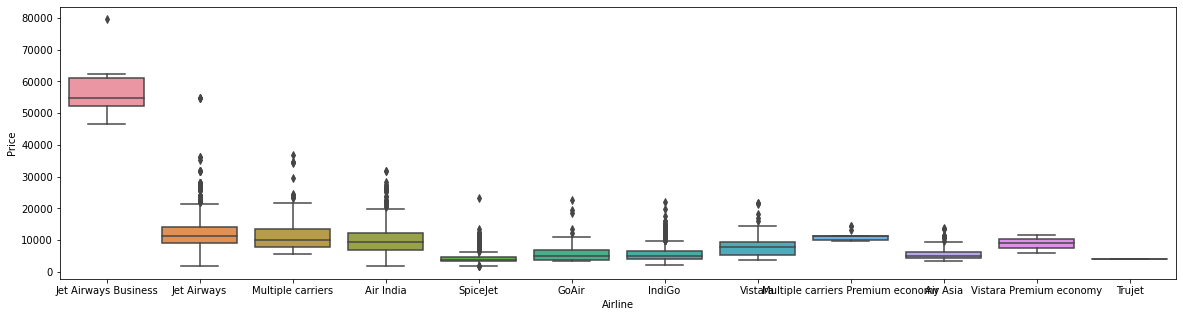

In [64]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Airline', y='Price',data=train_data.sort_values('Price',ascending=False))

# One-hot Encoding

In [65]:
Airline = pd.get_dummies(categorical['Airline'],drop_first=True) 

In [66]:
##Creating new Dataframe

In [67]:
Source = pd.get_dummies(categorical['Source'],drop_first=True) 

In [68]:
Destination = pd.get_dummies(categorical['Destination'],drop_first=True) 

In [69]:
categorical['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [70]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

<ipython-input-70-4d2e7a50b43c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
<ipython-input-70-4d2e7a50b43c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
<ipython-input-70-4d2e7a50b43c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [71]:
##Splitting each route to the seperate routes

In [72]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [73]:
drop_column(categorical,'Route')

C:\Users\Siamak\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [75]:
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)

C:\Users\Siamak\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [76]:
##These are columns that contain missing values

In [77]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [78]:
##It doesn't have any missing value

In [79]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [80]:
##To check how many categories exist for each feature

In [81]:
##Route 2,3 and 4 has high number of features and if we want to use one-hot encoding will create more columns and our data will be big
##To get rid of this issue, we use label encoder

# Label Encoding

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
encoder = LabelEncoder()

In [84]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [85]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [86]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])
    

<ipython-input-86-77ba464ee463>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [87]:
## All of our rout data change to integer format

In [88]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [89]:
drop_column(categorical,'Additional_Info')

C:\Users\Siamak\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [90]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [91]:
dict={'non-stop':0, '2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}

In [92]:
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

<ipython-input-92-6b9ec31b02d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [93]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [94]:
data_train = pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)

C:\Users\Siamak\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [95]:
# To concatinate all dataframes(categorical and Continous)

In [96]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,trip_day,trip_month,"(Dep_Time, _hour)","(Dep_Time, _min)","(Arrival_Time, _hour)","(Arrival_Time, _min)",duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [97]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [98]:
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,trip_day,trip_month,"(Dep_Time, _hour)","(Dep_Time, _min)","(Arrival_Time, _hour)","(Arrival_Time, _min)",duration_hour,duration_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [99]:
## To maximie the display

# Outliers Imputation

In [ ]:
## In Statistic, imputation is the process of replacing missing data with substituted values.

In [ ]:
## Two main plots that are a good repesentative of outliers are Distribution and Boxplot

In [101]:
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax = ax2)

C:\Users\Siamak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Siamak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


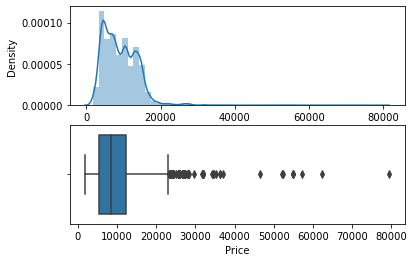

In [103]:
plot(data_train,'Price')

In [104]:
## Data points roughly bigger than 30000 are outliers
## We are gonna replace these data with median
## Whenever we have outliers, median is very habdy over there

In [109]:
data_train['Price'] = np.where(data_train['Price'] >= 30000,data_train['Price'].median(),data_train['Price'])

C:\Users\Siamak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Siamak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


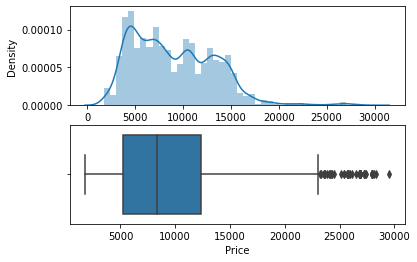

In [110]:
plot(data_train,'Price')

# Seperate Indipendant & Dependant Feature

In [111]:
x = data_train.drop('Price',axis=1)

In [114]:
y = data_train['Price']

In [116]:
## Plotting indipendant data in x axis and dependant plot in y

# Feature Selection

In [117]:
## Whenever we have to find best features which contributes most and has a good relationship with a target varaible
## It helps to eliminate curse of multiple dimentionality
## Here, we use information gain to extract important feature

In [119]:
from sklearn.feature_selection import mutual_info_classif

In [120]:
mutual_info_classif(x,y)

array([2.1180183 , 2.04510365, 2.77959641, 2.28436151, 1.45079895,
       0.78251414, 0.78339947, 0.08958897, 0.65529747, 0.92517902,
       0.00423145, 0.56220546, 0.01002928, 0.31029157, 0.        ,
       0.21214539, 0.        , 0.1731078 , 1.50707206, 0.90878806,
       0.29061744, 1.53221269, 0.39122558, 0.29076157, 0.18031621,
       0.37165977, 1.08554936, 0.87338379, 1.41583572, 1.19450865,
       1.85168055, 1.52972948, 1.7906636 , 1.09583053])

In [122]:
imp = pd.DataFrame(mutual_info_classif(x,y),index = x.columns)

In [123]:
imp

,0
Total_Stops,2.152043
Route_1,2.031097
Route_2,2.801910
Route_3,2.279530
Route_4,1.470956
Route_5,0.784830
Air India,0.761221
GoAir,0.105996
IndiGo,0.658570
Jet Airways,0.921427


In [124]:
imp.columns = ['importance']

In [126]:
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.801910
Route_3,2.279530
Total_Stops,2.152043
Route_1,2.031097
"(Arrival_Time, _hour)",1.831390
duration_hour,1.779996
Delhi,1.551114
Cochin,1.537397
"(Arrival_Time, _min)",1.524397
Route_4,1.470956


In [ ]:
## Sort the importance features based on contribution